<a href="https://colab.research.google.com/github/TranNgocKhoa/CSSubmit/blob/master/Week_3_Assignment_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

### Some of my ideas:

1. How many countries, unique countries are there? And how do the price change in different countries?
2. People from different countries will buy with different quantities?
3. Longer description items will have more price? Does the length of description affect the price? Does the length of description will make consumers buy more quantities?
4. Does the unit price affect the quantities?


In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Import data**

In [0]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
data = pd.read_csv(link, encoding='latin1')

In [37]:
# Print out First 5 rows from dataframe
# Your code here
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [38]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
186922,552888,16156S,WRAP PINK FAIRY CAKES,200,5/12/11 10:23,0.34,15061.0,United Kingdom
289041,562218,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,8/3/11 14:07,2.95,13851.0,United Kingdom
499856,578698,21485,RETROSPOT HEART HOT WATER BOTTLE,3,11/25/11 10:20,4.95,12620.0,France
257490,559535,M,Manual,1,7/10/11 12:16,3.75,17841.0,United Kingdom
504330,578947,21287,SCENTED VELVET LOUNGE CANDLE,12,11/27/11 13:49,0.38,14547.0,United Kingdom
300624,563206,23068,ALUMINIUM STAMPED HEART,8,8/14/11 12:08,2.49,17613.0,United Kingdom
166168,550899,POST,POSTAGE,4,4/21/11 12:07,40.00,13505.0,Switzerland
172685,C551551,M,Manual,-1,5/3/11 10:08,0.29,17841.0,United Kingdom
512110,579508,22076,6 RIBBONS EMPIRE,3,11/29/11 16:33,1.25,NaN,United Kingdom
272339,560772,22199,FRYING PAN RED RETROSPOT,3,7/20/11 16:12,4.13,NaN,United Kingdom


In [39]:
# Print out brief info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
data.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### My observation: 
Data columns have mixtype, so I had to use the param ```include="all"```

### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [41]:
# Your code here
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [42]:
# List all NaN values
data[data['CustomerID'].isnull()].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
398735,571257,21942,SKULLS DESIGN FLANNEL,1,10/14/11 17:17,1.63,NaN,United Kingdom
66567,541809,85123a,WHITE HANGING HEART T-LIGHT HOLDER,1,1/21/11 14:58,6.63,NaN,United Kingdom
201586,554310,21539,RED RETROSPOT BUTTER DISH,1,5/23/11 15:25,9.96,NaN,United Kingdom
203148,554512,21933,PINK VINTAGE PAISLEY PICNIC BAG,5,5/24/11 15:54,2.46,NaN,United Kingdom
264173,560090,16237,SLEEPING CAT ERASERS,1,7/14/11 16:46,0.42,NaN,United Kingdom


### My observation:
- Why customers without IDs can buy items? I thought that they can only buy items when they're logged in - which means they must have a customer ID
- For the null description: maybe the seller is lazy

### Remove items without description

In [0]:
_desIndex = data[data['Description'].isnull()].index
data.drop(_desIndex, inplace=True)

### More about null Customer ID

In [0]:
# from data info there are some NaN customer ids
# I will remove them
_cusIndex = data[data['CustomerID'].isnull()].index
data.drop(_cusIndex, inplace=True)

### Check unique CustomerID

In [45]:
data['CustomerID'].nunique() == data['CustomerID'].count()

False

### My observation:
Duplicate IDs may mean that 1 customer buys many times

**Exclude negative Quatity entries**

In [46]:
negative_quantity = data[data['Quantity'] < 0]
print(len(negative_quantity))
negative_quantity.sample(10)

8905


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
445236,C574828,21535,RED RETROSPOT SMALL MILK JUG,-3,11/7/11 11:12,2.55,16232.0,United Kingdom
74462,C542427,85159A,"BLACK TEA,COFFEE,SUGAR JARS",-1,1/28/11 9:34,6.35,14180.0,United Kingdom
355892,C567978,22178,VICTORIAN GLASS HANGING T-LIGHT,-1,9/23/11 10:40,1.95,14546.0,United Kingdom
268333,C560409,21755,LOVE BUILDING BLOCK WORD,-3,7/18/11 14:24,5.95,16717.0,United Kingdom
130692,C547502,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,-1,3/23/11 12:42,0.65,14513.0,United Kingdom
195820,C553748,22194,BLACK DINER WALL CLOCK,-2,5/19/11 9:57,8.50,16676.0,United Kingdom
349893,C567543,23345,DOLLY GIRL BEAKER,-6,9/21/11 10:19,1.25,13418.0,United Kingdom
479277,C577151,22231,JIGSAW TREE WITH BIRDHOUSE,-15,11/18/11 9:50,1.45,12781.0,Czech Republic
384031,C570099,20723,STRAWBERRY CHARLOTTE BAG,-1,10/7/11 12:11,0.72,13798.0,United Kingdom
196361,C553840,22423,REGENCY CAKESTAND 3 TIER,-2,5/19/11 12:15,10.95,12471.0,Germany


In [0]:
data[data['Quantity'] < 0] = 0

### My observation:
How can they have negative quantity?

I replaced negative quantity with zero, because I think negative quantity is the same as you didn't buy the item

**Exclude negative Price entries**

In [48]:
negative_price = data[data['UnitPrice'] <= 0]
print(len(negative_price))
# I will remove the items with price < 0 and free items (price = 0) because I think free items don't make sense. I think.

8945


In [0]:
_index = data[data['UnitPrice'] <= 0].index
data.drop(_index, inplace=True)

### My observation:
There are only 2 rows with negative price, and I don't understand their description, so I just dropped it.

### Change column types because I want to change

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397884 non-null object
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null object
UnitPrice      397884 non-null float64
CustomerID     397884 non-null float64
Country        397884 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [0]:
data['CustomerID'] = data['CustomerID'].astype('int64')

### I will add a column Spent = Quantity * UnitPrice for each user

In [52]:
data["Spent"] = data['Quantity'] * data['UnitPrice']
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent
201309,554280,23301,GARDENERS KNEELING PAD KEEP CALM,12,5/23/11 13:35,1.65,14817,United Kingdom,19.80
7901,537065,21774,DECORATIVE CATS BATHROOM BOTTLE,12,12/5/10 11:57,1.25,12567,France,15.00
237662,557878,20752,BLUE POLKADOT WASHING UP GLOVES,4,6/23/11 13:13,2.10,16940,United Kingdom,8.40
182758,552572,23204,CHARLOTTE BAG APPLES DESIGN,100,5/10/11 12:11,0.72,14680,United Kingdom,72.00
540432,581486,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/11 9:38,3.75,17001,United Kingdom,15.00
464303,576087,22551,PLASTERS IN TIN SPACEBOY,12,11/14/11 8:31,1.65,12689,France,19.80
222165,556365,20979,36 PENCILS TUBE RED RETROSPOT,5,6/10/11 11:44,1.25,16370,United Kingdom,6.25
232142,557305,21462,"NURSERY A,B,C PAINTED LETTERS",1,6/19/11 14:42,6.75,13568,United Kingdom,6.75
469652,576602,23175,REGENCY MILK JUG PINK,24,11/15/11 15:20,2.75,14156,EIRE,66.00
79319,542929,22366,DOORMAT AIRMAIL,1,2/2/11 10:34,7.95,17811,United Kingdom,7.95


### I will split the InvoiceDate into more specific columns: Month, Date, Hour

In [0]:
# first change the date format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%y %H:%M')

In [0]:
# add Month column
data['Month'] = pd.DatetimeIndex(data["InvoiceDate"]).month

In [0]:
# add Date column
data["Day"] = pd.DatetimeIndex(data["InvoiceDate"]).day

In [0]:
# add Year column
data["Year"] = pd.DatetimeIndex(data["InvoiceDate"]).year

In [0]:
# add Hour column
data["Hour"] = pd.DatetimeIndex(data["InvoiceDate"]).hour

In [58]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Month,Day,Year,Hour
309021,564060,22627,MINT KITCHEN SCALES,1,2011-08-22 14:37:00,8.50,17073,United Kingdom,8.50,8,22,2011,14
362998,568531,22027,TEA PARTY BIRTHDAY CARD,12,2011-09-27 13:49:00,0.42,16713,United Kingdom,5.04,9,27,2011,13
150618,549471,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,30,2011-04-08 14:39:00,0.79,17389,United Kingdom,23.70,4,8,2011,14
246585,558707,10133,COLOURING PENCILS BROWN TUBE,4,2011-07-01 12:58:00,0.42,12748,United Kingdom,1.68,7,1,2011,12
293238,562587,22634,CHILDS BREAKFAST SET SPACEBOY,8,2011-08-07 14:34:00,8.50,15640,United Kingdom,68.00,8,7,2011,14
17983,537789,21069,VINTAGE BILLBOARD TEA MUG,12,2010-12-08 12:49:00,1.25,14051,United Kingdom,15.00,12,8,2010,12
395441,571034,23504,PLAYING CARDS JUBILEE UNION JACK,12,2011-10-13 12:47:00,1.25,12359,Cyprus,15.00,10,13,2011,12
279591,561332,23293,SET OF 12 FAIRY CAKE BAKING CASES,8,2011-07-26 14:25:00,0.83,13492,Switzerland,6.64,7,26,2011,14
179786,552286,22384,LUNCH BAG PINK POLKADOT,1,2011-05-08 13:07:00,1.65,16393,United Kingdom,1.65,5,8,2011,13
298260,563012,16238,PARTY TIME PENCIL ERASERS,3,2011-08-11 12:00:00,0.21,17284,United Kingdom,0.63,8,11,2011,12


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 13 columns):
InvoiceNo      397884 non-null object
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null datetime64[ns]
UnitPrice      397884 non-null float64
CustomerID     397884 non-null int64
Country        397884 non-null object
Spent          397884 non-null float64
Month          397884 non-null int64
Day            397884 non-null int64
Year           397884 non-null int64
Hour           397884 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 42.5+ MB


In [60]:
orders = data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
UK_customers = orders[orders["Country"] == "United Kingdom"]
UK_customers['InvoiceNo'].max()

7847

**The customer with the highest money spent on purchases comes from Netherlands**

In [61]:
spent = data.groupby(by=['CustomerID', 'Country'], as_index=False)['Spent'].count()
Neth_customers = spent[spent["Country"] == "Netherlands"]
Neth_customers['Spent'].max()

2076

**On which year had the highest sales?**

In [0]:
# I don't understand the question

**How many orders (per hour)?**

In [63]:
orders_per_hour = data.groupby('InvoiceNo')['Hour'].unique().value_counts()
orders_per_hour

[12]        3129
[13]        2636
[11]        2276
[14]        2274
[10]        2226
[15]        2037
[9]         1393
[16]        1100
[8]          555
[17]         544
[18]         169
[19]         144
[7]           29
[20]          18
[6]            1
[11, 12]       1
Name: Hour, dtype: int64

**Make a plot about number of orders per hour**

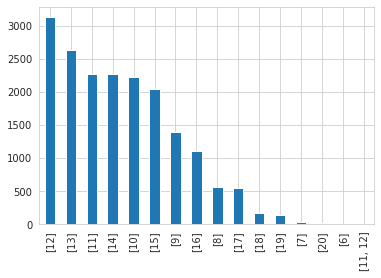

In [64]:
orders_per_hour.plot(kind="bar")

### My observation:
Maybe at noon people order the most because it's their break time, so they have time to surf the Internet and do shopping

**How many orders (per month)?**

In [65]:
orders_per_month = data.groupby('InvoiceNo')['Month'].unique().value_counts()
orders_per_month

[11]    2657
[12]    2178
[10]    1929
[9]     1755
[5]     1555
[6]     1393
[7]     1331
[3]     1321
[8]     1280
[4]     1149
[2]      997
[1]      987
Name: Month, dtype: int64

**Make a plot about number of orders per month**

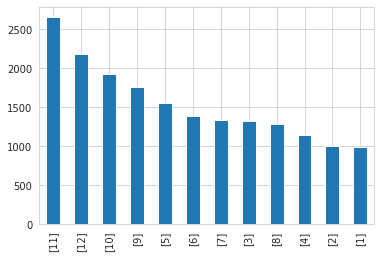

In [66]:
orders_per_month.plot(kind="bar")

### My observation:
At the end of the year (October, November, December), there are alot of holidays, such as Haloween, Thanksgiving, Black Friday, Christmas, New Year's Eve. So people will buy more

**Top 10 items most sales**

In [67]:
items = data.groupby(by=['StockCode'], as_index=False)['InvoiceNo'].count()
items['InvoiceNo'].max()

2035

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

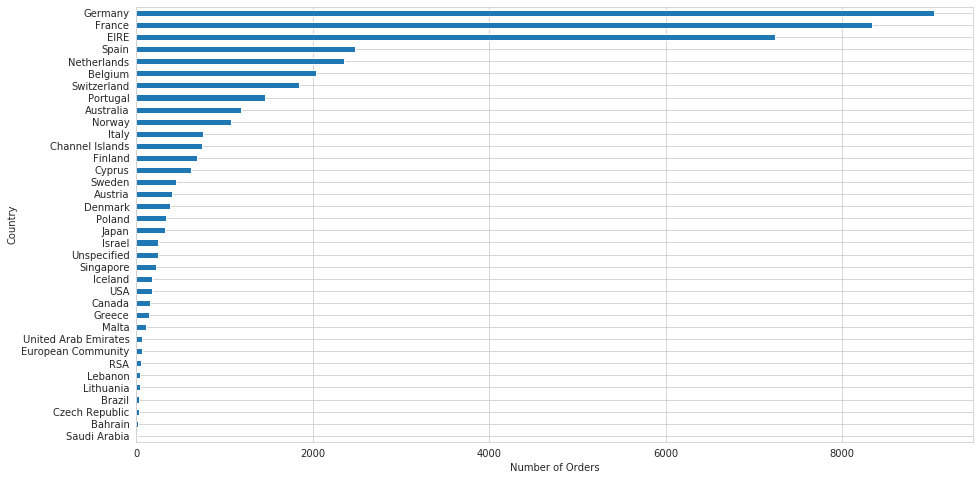

In [68]:
# Your code here
country_orders = data.groupby('Country')['InvoiceNo'].count().sort_values()
del country_orders['United Kingdom']

plt.subplots(figsize=(15,8))
country_orders.plot('barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.show()

# What can you tell about this?

### You are awesome!!